In [12]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
from tqdm.auto import tqdm
from data.loader import load_and_score
from data.constants import DATA_DIR

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Pulitzer Prizes

  0%|          | 0/616 [00:00<?, ?it/s]

  0%|          | 0/616 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

/tmp/ipykernel_9341/1700142485.py:20: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  m = pd.concat([ff.sample(pp.shape[0]), pp, ppoetry, pnf, pdra], 0)


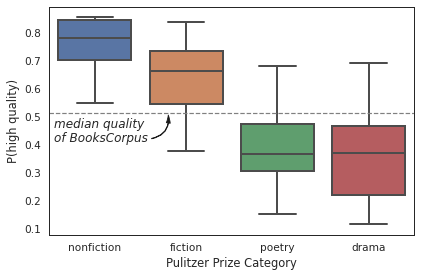

In [9]:

ff = load_and_score("../demix-data/fanfiction.jsonl")
ff['genre'] = 'fan fiction'

pp = load_and_score("../demix-data/pulitzer_prize_fiction.jsonl")

pp['genre'] = 'fiction'

ppoetry = load_and_score("../demix-data/pulitzer_prize_poetry.jsonl")

ppoetry['genre'] = 'poetry'

pnf = load_and_score("../demix-data/pulitzer_prize_nonfiction.jsonl")

pnf['genre'] = 'nonfiction'

pdra = load_and_score("../demix-data/pulitzer_prize_drama.jsonl")

pdra['genre'] = 'drama'

m = pd.concat([ff.sample(pp.shape[0]), pp, ppoetry, pnf, pdra], 0)

sns.set(style='white',font_scale=1.2,context='paper')
ax = sns.boxplot(data=m, x='genre', y='prob_high_quality', linewidth=2, order=['nonfiction', 'fiction', 'poetry', 'drama'])
plt.axhline(y=ff.prob_high_quality.median(), color='gray', linestyle='--')
plt.text(-0.45, 0.46, "median quality", fontsize=12,fontstyle='italic')
plt.text(-0.45, 0.41, "of BooksCorpus", fontsize=12,fontstyle='italic')


from matplotlib import patches
style = "Simple, tail_width=0.5, head_width=4, head_length=8"
kw = dict(arrowstyle=style, color="k")
a1 = patches.FancyArrowPatch((0.6, 0.42), (0.8, ff.prob_high_quality.median()),
                        connectionstyle="arc3,rad=.5", **kw)

for a in [a1]:
    plt.gca().add_patch(a)
    
ax.set_ylabel("P(high quality)")
ax.set_xlabel("Pulitzer Prize Category")
plt.tight_layout()
# plt.savefig("pulitzer_prize.pdf", dpi=300, bbox_inches='tight')


## High and low factuality news

In [13]:
high_news = load_and_score(path=DATA_DIR / "articles-high-reliability-clean.jsonl")
low_news = load_and_score(path=DATA_DIR / "articles-low-reliability-clean.jsonl")

  0%|          | 0/9939 [00:00<?, ?it/s]

  0%|          | 0/9939 [00:00<?, ?it/s]

  0%|          | 0/7662 [00:00<?, ?it/s]

  0%|          | 0/7662 [00:00<?, ?it/s]

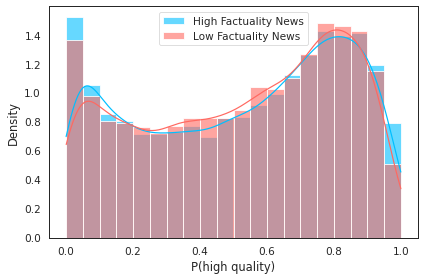

In [14]:
sns.histplot(high_news.prob_high_quality, label='High Factuality News', kde=True, stat='density', color='#00bfff', alpha=0.6)

ax = sns.histplot(low_news.prob_high_quality, label='Low Factuality News', kde=True, stat='density', color='#ff6961', alpha=0.6)
plt.legend()
ax.set_xlabel("P(high quality)")
plt.tight_layout()
plt.savefig("high_low_news.pdf", dpi=300, bbox_inches='tight')
